# Comparison of Measured and Simulated Data for Building Performance Analysis

This notebook follows part of the calibration process outlined in the IBPSA-USA 2014 Conference Paper entitled: *BIM-EXTRACTED ENERGYPLUS MODEL CALIBRATION FOR RETROFIT ANALYSIS OF A HISTORICALLY LISTED BUILDING IN SWITZERLAND*

The full paper can be found online:

https://www.researchgate.net/publication/263547831_BIM-extracted_Energyplus_model_calibration_for_retrofit_analysis_of_a_historically_listed_building_in_Switzerland

Created  by Clayton Miller (miller.clayton@arch.ethz.ch)

### We have a scenario here where we have measured data for a heating system of a building and we want to compare the measured data to that of an EnergyPlus model for calibration purposes.

## 1. Baseline Model Calibration

First we need to load the appropriate libraries:

In [1]:
%matplotlib inline

In [2]:
#Load all libraries
import pandas as pd
import datetime
from datetime import timedelta
import time
import brewer2mpl

These are parameter settings for the `matplotlib` graphics:

In [3]:
# settings for graphics
# rcParams['figure.figsize'] = 20, 10
# rcParams['font.size'] = 16
bmap = brewer2mpl.get_map('Set3', 'qualitative', 12)
bmap2 = brewer2mpl.get_map('Set1', 'qualitative', 9)
colors = bmap.mpl_colors
colors2 = bmap2.mpl_colors
# rcParams['axes.color_cycle'] = colors2

In [4]:
# general settings
show_images = True # show equations etc.?
language_german = False; # False -> english, True -> german

## Load the Measured Heating Data

First, we will load the measured dataset for the project.

In [5]:
HeatingSystemMeasurementData = pd.read_csv('MeasuredHeatingData2.csv',index_col='Date_Time', parse_dates=True, dayfirst=True)

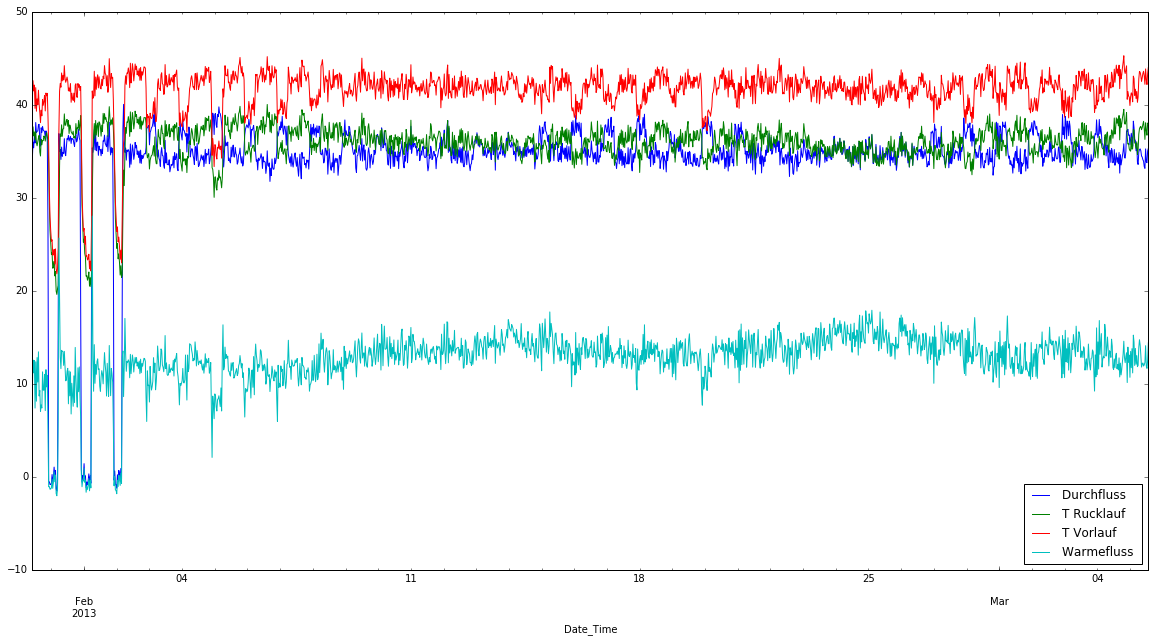

In [9]:
HeatingSystemMeasurementData.resample('30min').mean().plot(figsize=(20,10));

In [10]:
HeatingSystemMeasurementData.head()

,Durchfluss,T Rucklauf,T Vorlauf,Warmefluss
Date_Time,,,,
2013-01-30 10:18:00,33.605218,33.605218,40.405218,14.005218
2013-01-30 10:19:00,30.684937,31.484937,37.084937,8.484937
2013-01-30 10:20:00,31.989200,33.989200,38.489200,7.689200
2013-01-30 10:21:00,38.055004,40.455004,43.955004,11.555004
2013-01-30 10:22:00,26.724705,29.324705,31.924705,-1.575295


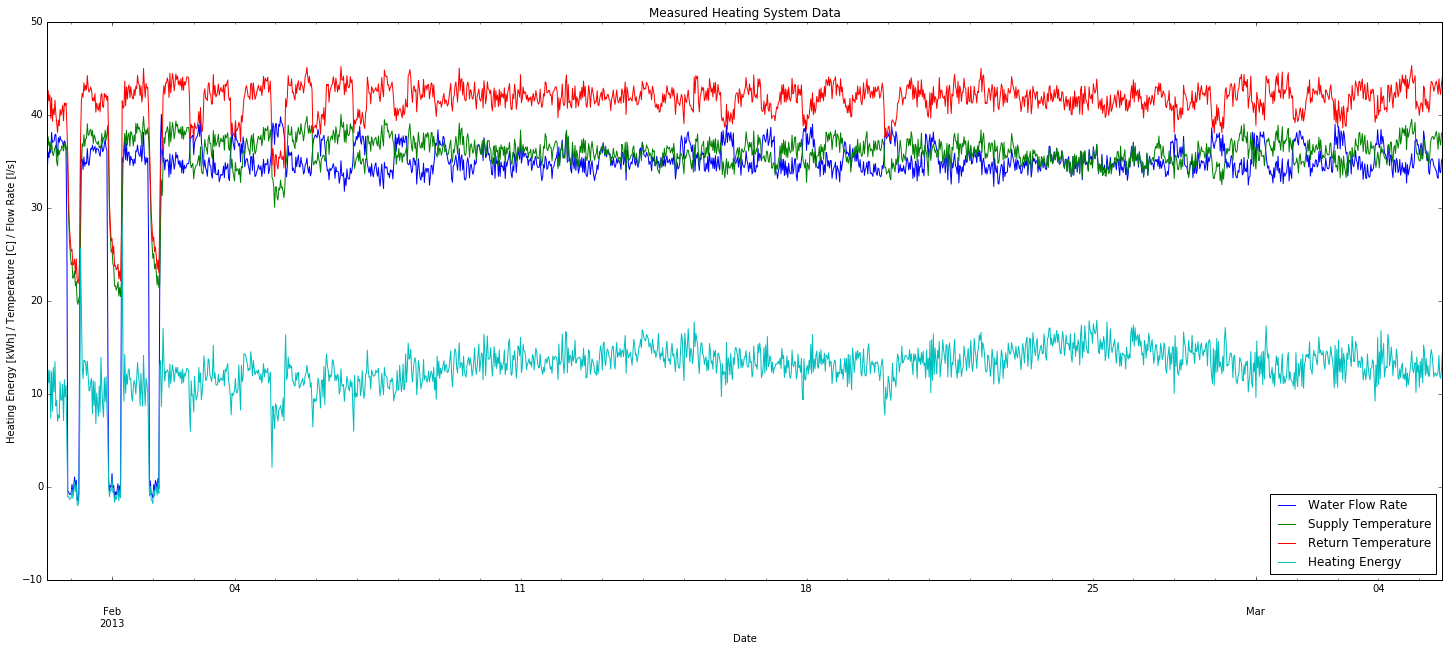

In [39]:
if language_german:
    ylabel_str = "Heizenergie [kWh] / Temperatur [C] / Durchflussrate [l/s]"
    xlabel_str = 'Datum'
    title_str  = "Messdaten Heizungssystem"
    label_str = ['Durchfluss','Vorlauftemperatur','Rücklauftemperatur','Heizenergie']
else:
    ylabel_str = "Heating Energy [kWh] / Temperature [C] / Flow Rate [l/s]"
    xlabel_str = 'Date'
    title_str = "Measured Heating System Data"
    label_str = ['Water Flow Rate','Supply Temperature','Return Temperature','Heating Energy']
    
ContractorHeatingMeasure = HeatingSystemMeasurementData.resample('30min').mean().plot(figsize=(25,10))
ContractorHeatingMeasure.set_ylabel(ylabel_str); ContractorHeatingMeasure.set_title(title_str); ContractorHeatingMeasure.set_xlabel(xlabel_str);
ContractorHeatingMeasure.legend(label_str,loc=4)
# plt.savefig('Measured_Data.pdf')

In [40]:
MeasuredHeatingData = pd.DataFrame(HeatingSystemMeasurementData['Warmefluss '].resample('H').mean())
MeasuredHeatingData.columns = ['Measured Data']
MeasuredHeatingData

,Measured Data
Date_Time,
2013-01-30 10:00:00,11.624310
2013-01-30 11:00:00,11.873951
2013-01-30 12:00:00,9.909068
2013-01-30 13:00:00,10.504819
2013-01-30 14:00:00,11.845261
2013-01-30 15:00:00,9.023448
2013-01-30 16:00:00,7.412744
2013-01-30 17:00:00,9.372601
2013-01-30 18:00:00,9.347366


## Load the Temperature Measurement System Data

Temperature data was collected from many of the zones in order to establish estimates for the zone heating control strategies.

In [41]:
MeasuredTempData = pd.read_csv('MeasuredTempData2.csv',sep=',', index_col='timestamp')

In [42]:
MeasuredTempData#.resample('D')

,"('Buro 0.6', 'EXTlight IR spectrum')","('Buro 0.6', 'EXTlight full spectrum')","('Buro 0.6', 'EXTlight illuminance')","('Buro 0.6', 'EXTrelative humidity')","('Buro 0.6', 'EXTtemperature')","('Buro 0.6', 'INTrelative humidity')","('Buro 0.6', 'INTtemperature')","('Buro 0.6', 'RADtemperature radiator IN')","('Buro 0.6', 'RADtemperature radiator OUT')","('Buro 0.8', 'EXTlight IR spectrum')",...,"('Dach', 'WEAtemperature')","('Dach', 'WEAwind direction')","('Dach', 'WEAwind speed')","('Heizung -1.3', 'OILoil consumption')","('Heizung -1.3', 'OILtemperature burner IN')","('Heizung -1.3', 'OILtemperature burner OUT')","('Treppe 0.1', 'INTrelative humidity')","('Treppe 0.1', 'INTtemperature')","('Treppe 3.1', 'INTrelative humidity')","('Treppe 3.1', 'INTtemperature')"
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-01-30 00:00:00,0.245363,0.881727,0.790818,92.932636,6.358545,28.849909,22.602636,35.763242,34.232409,NaN,...,NaN,NaN,NaN,0.406159,32.461784,35.969909,41.452636,18.334454,40.715909,18.019909
2013-01-30 01:00:00,-1.798157,-1.389066,-1.389066,85.758207,5.991389,27.105480,20.440025,32.438207,31.129116,NaN,...,NaN,NaN,NaN,-1.648157,29.518093,32.694343,39.700025,16.368207,38.712510,16.060510
2013-01-30 02:00:00,-0.530792,-0.076246,-0.076246,84.824663,8.023754,28.511027,21.577390,33.267390,31.989208,NaN,...,NaN,NaN,NaN,-0.387042,30.488583,33.543583,41.298299,17.616481,40.109875,17.391208
2013-01-30 03:00:00,0.143921,0.572492,0.572492,82.792921,9.529921,29.403921,22.132810,32.495921,31.458921,NaN,...,NaN,NaN,NaN,0.218921,30.074546,32.867046,42.245921,18.340921,41.013921,18.104546
2013-01-30 04:00:00,-1.976616,-1.526616,-1.526616,81.292384,7.426384,27.346111,19.913384,30.712475,29.378838,NaN,...,NaN,NaN,NaN,-1.853087,27.865148,30.888678,40.148838,16.225202,39.069384,15.996050
2013-01-30 05:00:00,-0.977819,-0.477819,-0.477819,81.931705,8.398847,28.296181,20.826181,31.671272,30.144908,NaN,...,NaN,NaN,NaN,-0.765319,28.717806,33.451556,41.422181,17.281181,40.190181,17.030847
2013-01-30 06:00:00,-0.696053,-0.196053,-0.196053,88.723947,5.780765,28.220311,21.497583,40.749402,36.681220,NaN,...,NaN,NaN,NaN,-0.533553,34.193947,40.748947,40.823038,17.427583,40.483947,17.270822
2013-01-30 07:00:00,4.566072,19.111527,10.884254,88.216981,6.818345,27.647890,21.660618,40.851527,37.972436,NaN,...,-40.888473,2.861527,32.299027,-0.725973,35.849027,41.771527,40.879709,17.284254,39.734860,17.104860
2013-01-30 08:00:00,459.588145,1152.179054,442.679054,84.166327,8.829054,27.122690,21.456327,39.714508,36.925418,NaN,...,NaN,NaN,NaN,-1.194972,34.545742,40.670742,44.056327,17.107236,41.274849,16.674224


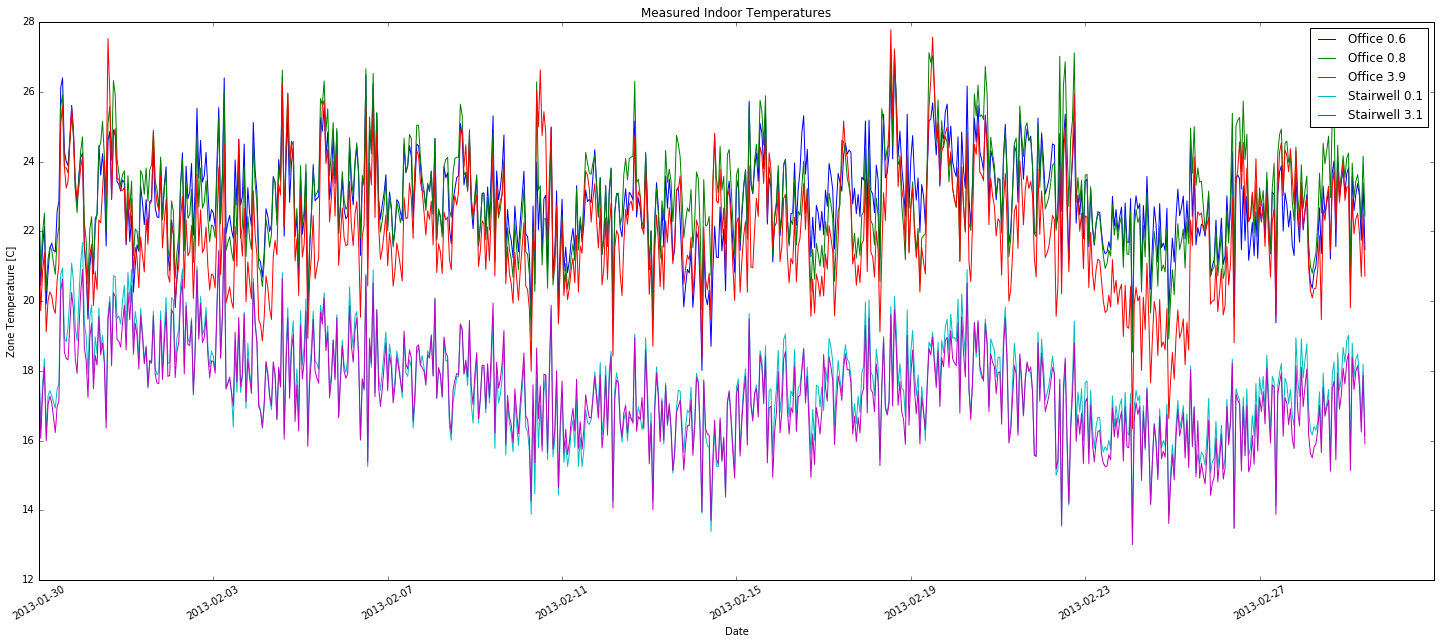

In [43]:
# get indices for columns that contain 'INTtemperature'
idx = [i for i, col in enumerate(MeasuredTempData.columns) if 'INTtemperature' in col]
#idx

InteriorTemperatures = MeasuredTempData[MeasuredTempData.columns[idx]]#.resample('30min').truncate(before='2013-01-30')
IntTemp = InteriorTemperatures.plot(figsize=(25,10),xticks=range(0,850,96))
if language_german:
    ylabel_str = "Raumtemperatur [C]"; xlabel_str = "Datum"; title_str = "Raumteperaturen Gemessen"
else:
    ylabel_str = "Zone Temperature [C]"; xlabel_str = "Date"; title_str = "Measured Indoor Temperatures"
    
IntTemp.set_ylabel(ylabel_str); IntTemp.set_xlabel(xlabel_str); IntTemp.set_title(title_str)

handles, labels = IntTemp.get_legend_handles_labels()
labels = [l.replace("('",'').replace("', 'INTtemperature')",'') for l in labels]
if language_german:
    labels = [l.replace('Buro','Büro').replace('Treppe','Treppenhaus') for l in labels]
else:
    labels = [l.replace('Buro','Office').replace('Treppe','Stairwell') for l in labels]

IntTemp.legend(labels)
labels = IntTemp.get_xticklabels();
labels = [l.get_text().replace(' 00:00:00','') for l in labels]
IntTemp.set_xticklabels(labels,rotation=30);
# plt.savefig('MeasuredIndoorTemperatures.pdf')

## Energyplus Simulations

Now we load the data from the EnergyPlus simulations of the building.

The first step is to load the functions which convert the timestamps to the proper format and to load the data

In [61]:
#Function to convert timestamps
def eplustimestamp(simdata,year_start_time=2013):
    timestampdict={}
    for i,row in simdata.T.iteritems():
        timestamp = str(year_start_time) + row['Date/Time']
        try:
            timestampdict[i] = datetime.datetime.strptime(timestamp,'%Y %m/%d  %H:%M:%S')
        except ValueError:
            tempts = timestamp.replace(' 24', ' 23')
            timestampdict[i] = datetime.datetime.strptime(tempts,'%Y %m/%d  %H:%M:%S')
            timestampdict[i] += timedelta(hours=1)
    timestampseries = pd.Series(timestampdict)
    return timestampseries

In [62]:
def loadsimdata(file,pointname,ConvFactor,year_start_time=2013):
    df = pd.read_csv(file)
    df['desiredpoint'] = df[pointname]*ConvFactor
    df.index = eplustimestamp(df,year_start_time)
    pointdf = df['desiredpoint']
    return pointdf

This `for` loop cycles through each of the simulation files and loads the necessary energy data for comparison to the measured data

In [63]:
Simlist = ['Sim1Data.csv','Sim2Data.csv','Sim3Data.csv','Sim4Data.csv']
SimHeatingDataList = []
for file in Simlist:
    print 'Loading '+file
    x = loadsimdata(file,'EMS:All Zones Total Heating Energy {J}(Hourly)',0.0000002778)
    SimHeatingDataList.append(x)

Loading Sim1Data.csv
Loading Sim2Data.csv
Loading Sim3Data.csv
Loading Sim4Data.csv


We then concatenate the individual files and plot the results

In [47]:
SimHeatingData = pd.concat(SimHeatingDataList, axis=1, keys=Simlist)

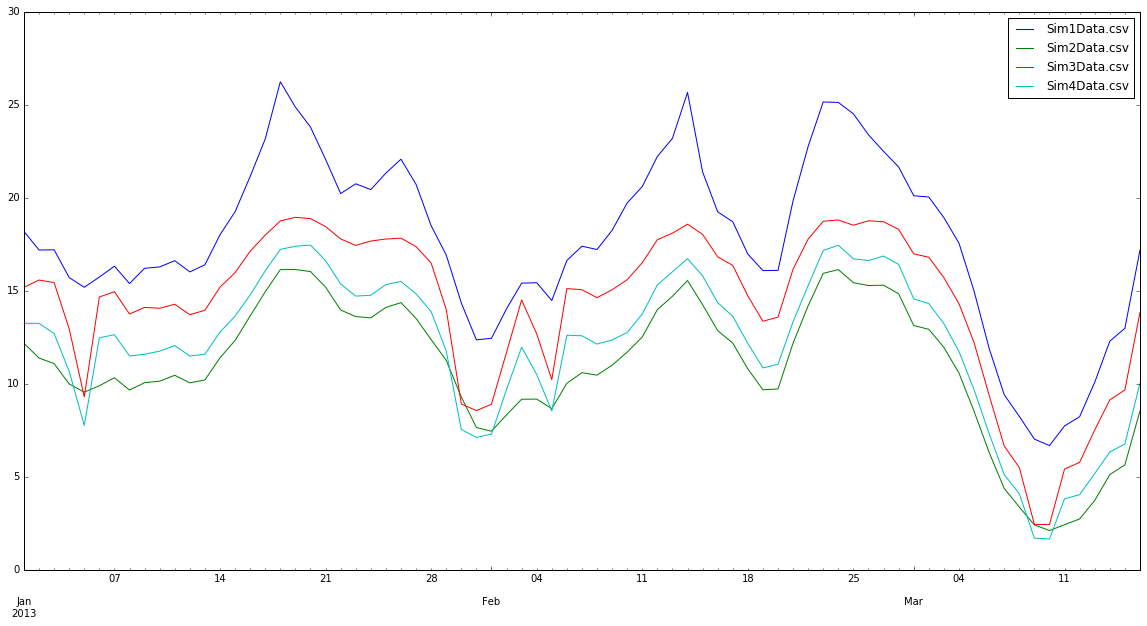

In [48]:
SimHeatingData.resample('D').mean().plot(figsize=(20,10))

## Combine the Measured and Simulated Heating Data

Now, we can merge the measured and simulated data to perform a calibration comparison

In [49]:
CombinedHeating = pd.merge(SimHeatingData, MeasuredHeatingData, right_index=True, left_index=True)
CombinedHeating.head()

,Sim1Data.csv,Sim2Data.csv,Sim3Data.csv,Sim4Data.csv,Measured Data
2013-01-30 10:00:00,13.225807,8.277458,15.919851,13.525517,11.624310
2013-01-30 11:00:00,11.368303,6.643130,13.904919,11.515597,11.873951
2013-01-30 12:00:00,9.111422,4.597825,11.437841,8.986762,9.909068
2013-01-30 13:00:00,10.444604,5.808336,12.570568,10.165148,10.504819
2013-01-30 14:00:00,10.629545,6.157425,12.476334,10.325218,11.845261


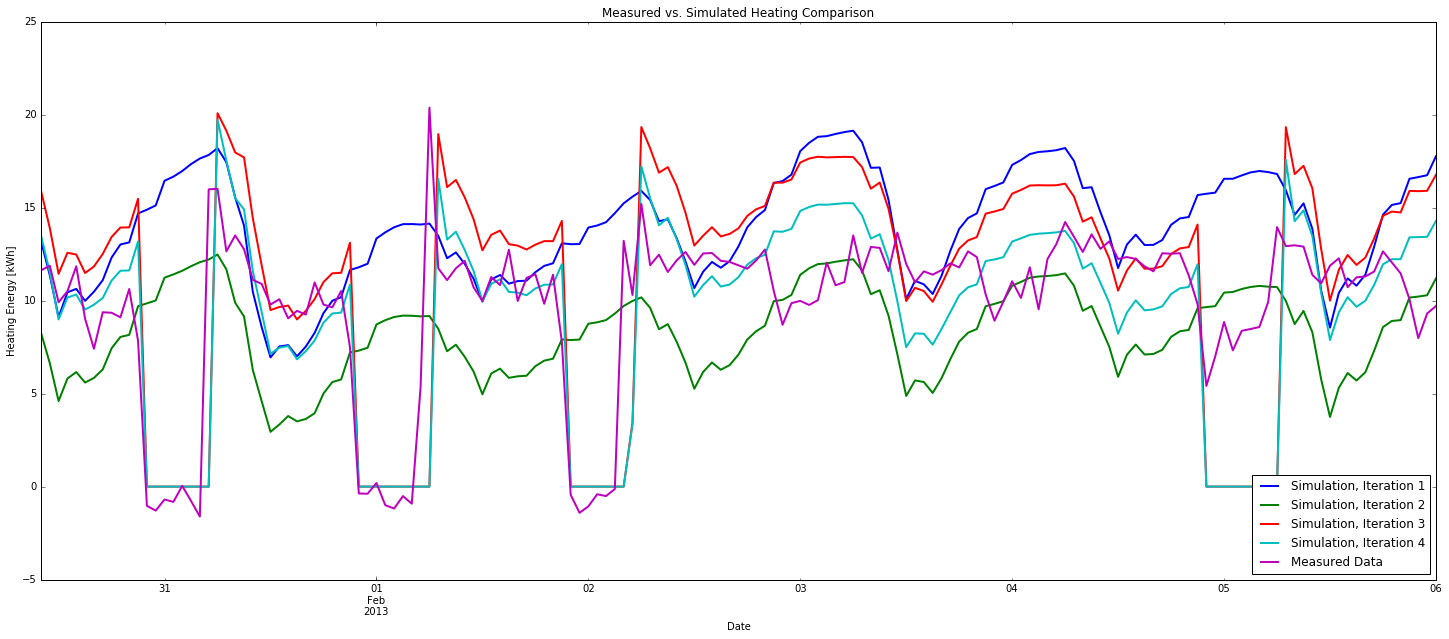

In [50]:
do_truncate = True;

if do_truncate:
    SimVsMeasHeating = CombinedHeating.truncate(after='2013-02-06').plot(figsize=(25,10),linewidth=2)
else:
    SimVsMeasHeating = CombinedHeating.plot(figsize=(25,10),linewidth=2)

if language_german:
    ylabel_str = 'Heizenergie [kWh]'; xlabel_str = "Datum"; title_str = 'Vergleich Messung / Simulation';
    labels = ['Simulation, Iteration 1', 'Simulation, Iteration 2', 'Simulation, Iteration 3', 'Simulation, Iteration 4', 'Messdaten']
else:
    ylabel_str = 'Heating Energy [kWh]'; xlabel_str = "Date"; title_str = 'Measured vs. Simulated Heating Comparison';
    labels = ['Simulation, Iteration 1', 'Simulation, Iteration 2', 'Simulation, Iteration 3', 'Simulation, Iteration 4', 'Measured Data']

SimVsMeasHeating.set_ylabel(ylabel_str); SimVsMeasHeating.set_xlabel(xlabel_str); SimVsMeasHeating.set_title(title_str);
SimVsMeasHeating.legend(labels,loc=4)

# if do_truncate:
#     savefig('Measured_vs_Simulated_zoom.pdf')
# else:
#     savefig('Measured_vs_Simulated.pdf')

In [51]:
from __future__ import division

In [52]:
CombinedHeating

,Sim1Data.csv,Sim2Data.csv,Sim3Data.csv,Sim4Data.csv,Measured Data
2013-01-30 10:00:00,13.225807,8.277458,15.919851,13.525517,11.624310
2013-01-30 11:00:00,11.368303,6.643130,13.904919,11.515597,11.873951
2013-01-30 12:00:00,9.111422,4.597825,11.437841,8.986762,9.909068
2013-01-30 13:00:00,10.444604,5.808336,12.570568,10.165148,10.504819
2013-01-30 14:00:00,10.629545,6.157425,12.476334,10.325218,11.845261
2013-01-30 15:00:00,9.986541,5.593479,11.484208,9.514814,9.023448
2013-01-30 16:00:00,10.477064,5.844133,11.832688,9.780320,7.412744
2013-01-30 17:00:00,11.099034,6.299036,12.509819,10.140341,9.372601
2013-01-30 18:00:00,12.312928,7.434653,13.421618,11.078380,9.347366
2013-01-30 19:00:00,13.018035,8.046310,13.928466,11.604929,9.100086


We compare the measured and simulated datasets using two metrics established by ASHRAE standard 14 and the IPMVP:

In [53]:
dataset = 'Sim4Data.csv'
NMBE = 100*(sum(CombinedHeating['Measured Data'] - CombinedHeating[dataset] )/(CombinedHeating['Measured Data'].count()*CombinedHeating['Measured Data'].mean()))
CVRSME = 100*((sum((CombinedHeating['Measured Data'] - CombinedHeating[dataset] )**2)/(CombinedHeating['Measured Data'].count()-1))**(0.5))/CombinedHeating['Measured Data'].mean()

In [54]:
print 'NMBE: ' + str(round(NMBE,2)) + '    CVRSME : ' + str(round(CVRSME,2))

NMBE: -3.97    CVRSME : 25.24


Acceptable limits are outlined in ASHRAE Guideline 14 (https://www.ashrae.org/standards-research--technology/standards--guidelines/titles-purposes-and-scopes#Gdl14)

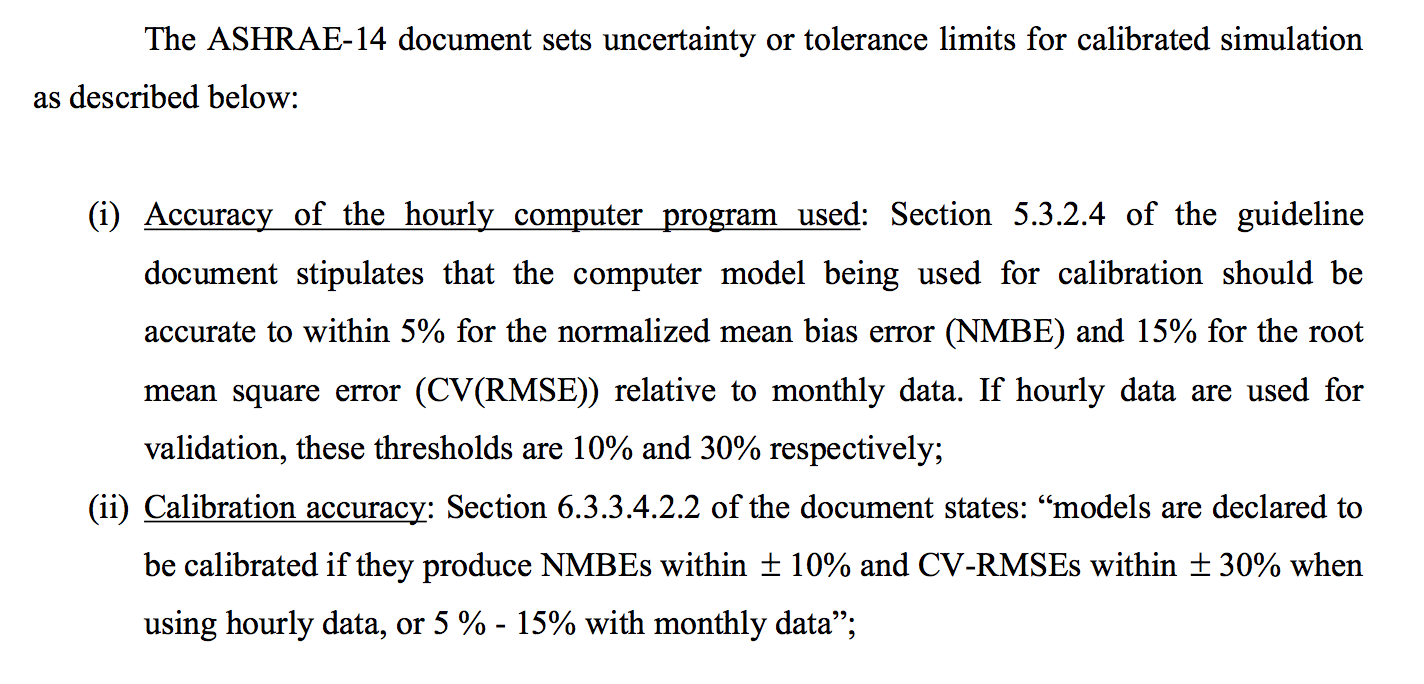

In [55]:
from IPython.core.display import Image
Image(filename='./ashrae14calibrationmetrics.png')

## Analysis of Retrofit Scenarios

Since we've established reasonable calibration according to hourly data, let's look at the retrofit scenarios:

In [67]:
SimRetrofitList = ['Sim4Data.csv',
                   'Retrofit1_Windows.csv',
                   'Retrofit1_Plaster.csv',
                   'Retrofit2_Aerogel.csv',
                   'Retrofit1_Ceiling.csv',
                   'Retrofit1_AirtightnessHigh.csv',
                   'Retrofit1.csv',
                   'Retrofit2.csv']
SimRetrofitDataList = []
for file in SimRetrofitList:
    try:
        x = loadsimdata('./'+file,'EMS:All Zones Total Heating Energy {J}(Hourly)',0.0000002778,"2012")
    except: 
        continue
    SimRetrofitDataList.append(x)

In [68]:
def get_retrofit_labels(labels,language_german):
    if language_german:
        labels = [l.replace('Sim4HC_SB3_','Ausgangszustand + ').replace('Sim4HC_SB3','Ausgangszustand').replace('1_',' nur ').replace('2_',' nur ').replace('Annual','').replace('Ausgangszustand + Retrofit','Retrofit ') for l in labels]
    else:
        labels = [l.replace('Sim4HC_SB3_','Baseline + ').replace('Sim4HC_SB3','Baseline').replace('1_',' only ').replace('2_',' only ').replace('Annual','').replace('Baseline + Retrofit','Retrofit') for l in labels]
    return labels

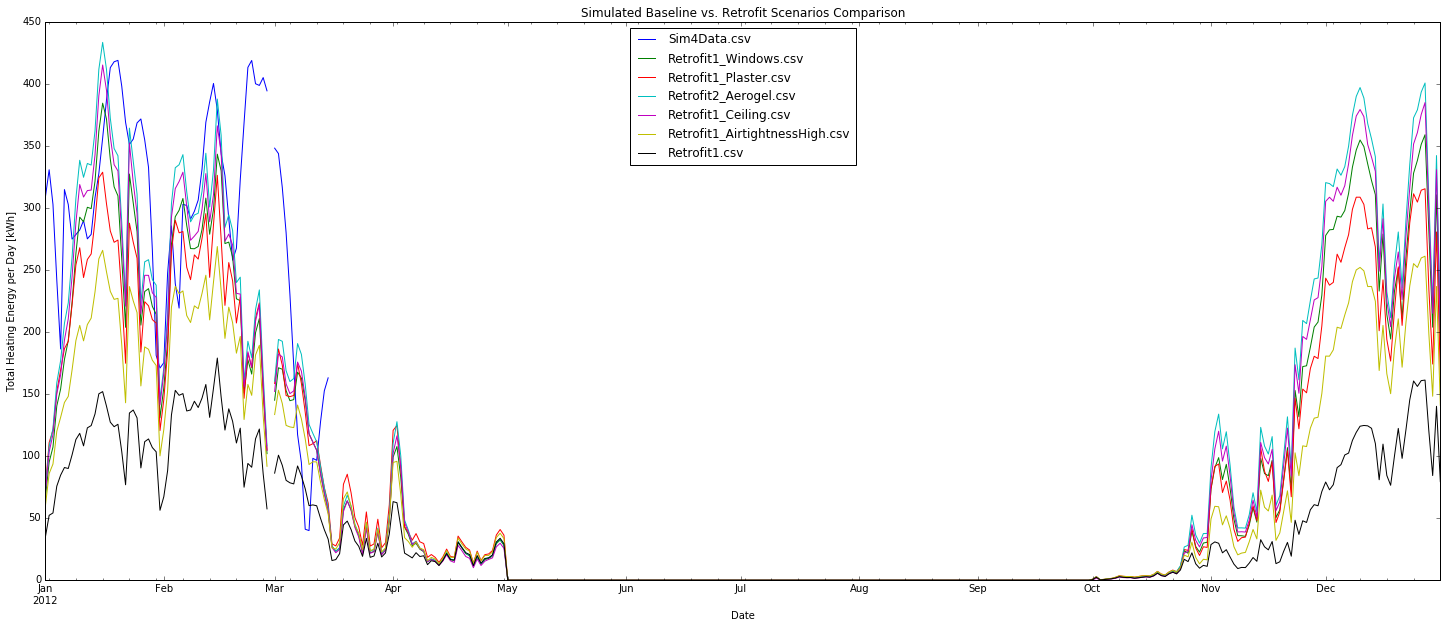

In [72]:
SimRetrofitData = pd.concat(SimRetrofitDataList, axis=1, keys=SimRetrofitList)
SimRetrofitHeating = SimRetrofitData.tshift(-1,freq='H').resample('D').sum().plot(figsize=(25,10),linewidth=1)

handles, labels = SimRetrofitHeating.get_legend_handles_labels()

if language_german:
    ylabel_str = 'Gesamt-Heizenergie pro Tag [kWh]'; xlabel_str = "Datum"; title_str = 'Vergleich Simulation Ausgangszustand und Renovations-Szenarien';
else:
    ylabel_str = 'Total Heating Energy per Day [kWh]'; xlabel_str = 'Date'; title_str = 'Simulated Baseline vs. Retrofit Scenarios Comparison';

SimRetrofitHeating.set_ylabel(ylabel_str); SimRetrofitHeating.set_xlabel(xlabel_str); SimRetrofitHeating.set_title(title_str)


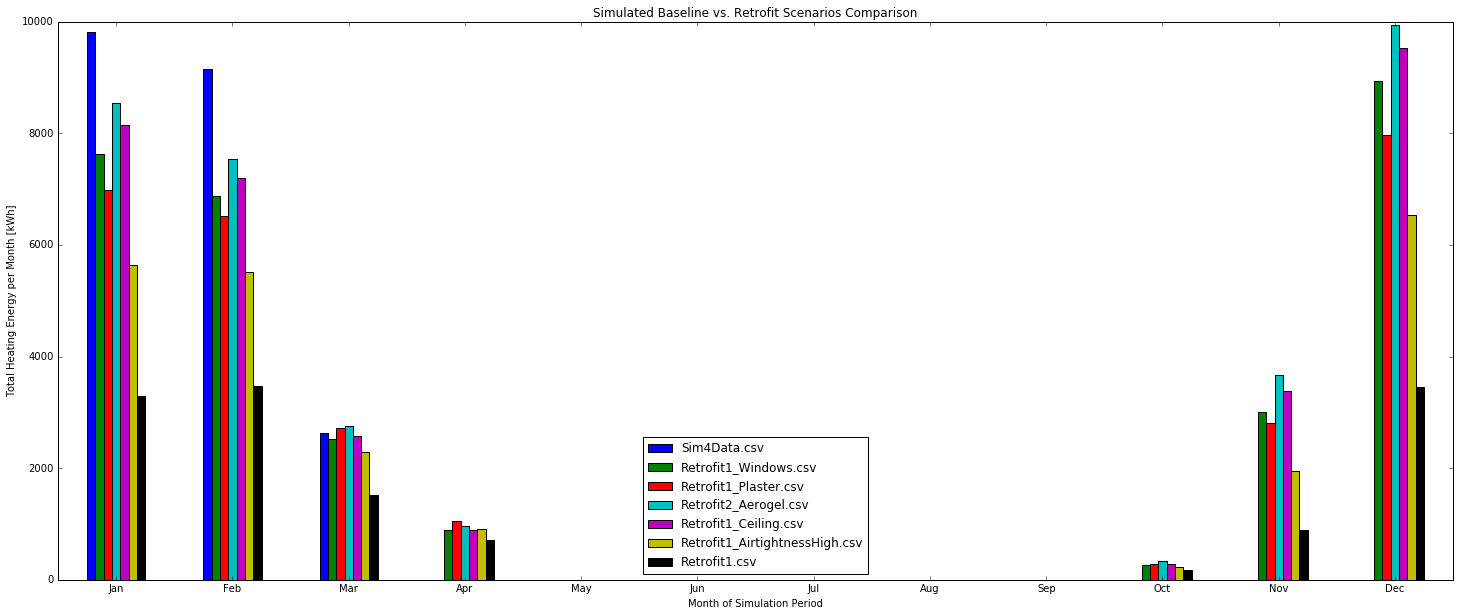

In [74]:
SimRetrofitData = pd.concat(SimRetrofitDataList, axis=1, keys=SimRetrofitList);
SimRetrofitDataHeatingMonthly = SimRetrofitData.tshift(-1,freq='H').resample('M').sum().plot(figsize=(25,10),kind='bar');

handles, labels = SimRetrofitDataHeatingMonthly.get_legend_handles_labels();

if language_german:
    ylabel_str = 'Gesamt-Heizenergie pro Monat [kWh]'; xlabel_str = 'Monat der Simulationsperiode'; title_str = 'Vergleich Simulation Ausgangszustand und Renovations-Szenarien';
else:
    ylabel_str = 'Total Heating Energy per Month [kWh]'; xlabel_str = 'Month of Simulation Period'; title_str = 'Simulated Baseline vs. Retrofit Scenarios Comparison';

SimRetrofitDataHeatingMonthly.set_ylabel(ylabel_str); SimRetrofitDataHeatingMonthly.set_xlabel(xlabel_str); SimRetrofitDataHeatingMonthly.set_title(title_str);

SimRetrofitDataHeatingMonthly.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0);


# Compile the hours not comfortable

We have to focus on the simulation `hours not comfortable` as they indicate success beyond just energy performance.

In [75]:
def get_air_temperatures_of_conditioned_zones(filename,unconditioned_zones):
    data = pd.read_csv(filename)
    data.index = eplustimestamp(data)
    columnlist = pd.Series(data.columns)
    columnlist = list(columnlist[(columnlist.str.endswith("Zone Mean Air Temperature [C](Hourly)"))])
    for zonename in unconditioned_zones: # filter out unconditioned zones
        columnlist = filter(lambda columnname: not zonename in columnname,columnlist)
    return data[columnlist]


def get_number_of_hours_not_comfortable(filename,unconditioned_zones):
    # settings
    beginocc = 6; endocc = 23; # hours occupied: beginocc < x < endocc
    endheating = 6; beginheating = 8; # months of heating period: x < endheating OR x > beginheating
    tempthreshold = 19.5
    
    # get data
    data = get_air_temperatures_of_conditioned_zones(filename,unconditioned_zones)
    
    # count uncomfortable hours
    d = dict()
    for rowname in data: 
        row = data[rowname]
        d[rowname.split(':')[0]] = len(row[(row < tempthreshold) 
                           & (row.index.hour > 6) & (row.index.hour < 23)
                           & ((row.index.month > beginheating) | (row.index.month < endheating))  ])
    return d, sum(d.values())

In [77]:
filename = 'Sim4Data.csv'

unconditioned_zones = ['ZONE_U1_W', 'ZONE_U1_N', 'ZONE_U1_ST', 'ZONE_00_ST', 'ZONE_01_ST', 'ZONE_02_ST', 
                       'ZONE_03_ST', 'ZONE_04_ST', 'ZONE_04_N', 'ZONE_05_N', 'ZONE_05_S']
unconditioned_zones.append('ZONE_U1_LA') # many uncomfortable hours here...

total_hours_not_comfortable = dict()
for filename in SimRetrofitList:
    try:
        hours_not_comfortable, N = get_number_of_hours_not_comfortable("./"+filename,unconditioned_zones)
        #print hours_not_comfortable # print per zone
        total_hours_not_comfortable[filename] = int(N/39.)
        print filename, int(N/39.)   # total, normalized by number of zones
    except:
        continue

Sim4Data.csv 1
Retrofit1_Windows.csv 1
Retrofit1_Plaster.csv 8
Retrofit1_Ceiling.csv 3
Retrofit1_AirtightnessHigh.csv 1
Retrofit1.csv 11
Retrofit2.csv 5


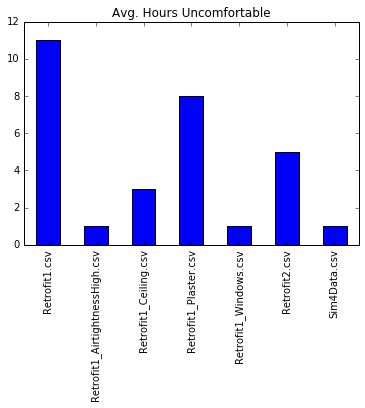

In [78]:
#fig = figure(figsize=(8,6),dpi=300, facecolor='w', edgecolor='k');
ComfortData = pd.Series(total_hours_not_comfortable)
ComfortData
ComfortPlot = ComfortData.plot(kind='bar')
ComfortPlot.set_title('Avg. Hours Uncomfortable')